#1. LIBRARY SETUP

In [2]:
!pip install -U vnstock3
!pip install mplfinance
!pip install EMD-signal
# Install necessary libraries
!pip install pyemd pandas numpy matplotlib tensorflow scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PyEMD import EMD, CEEMDAN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 32.5 MB/s eta 0:00:00


#2. DATA PREPARATION

## Vnstock3

In [3]:
## Load all libraries
# from vnstock3 import *

## Load the main working Wrapper (main UI of the library)
from vnstock3 import Vnstock



    Khi tiếp tục sử dụng Vnstock3, bạn xác nhận rằng bạn đã đọc, hiểu và đồng ý với Chính sách quyền riêng tư và Điều khoản, điều kiện về giấy phép sử dụng Vnstock3.

    Chi tiết:

    - Giấy phép sử dụng phần mềm: https://vnstocks.com/docs/tai-lieu/giay-phep-su-dung
    - Chính sách quyền riêng tư: https://vnstocks.com/docs/tai-lieu/chinh-sach-quyen-rieng-tu
    


In [4]:
# List all stock symbols by classification groups such as HOSE, VN30, VNMidCap, VNSmallCap, VNAllShare, VN100, ETF, HNX, HNX30, HNXCon, HNXFin, HNXLCap, HNXMSCap, HNXMan, UPCOM, FU_INDEX (futures index contracts), CW (covered warrants)

# HOSE
stock = Vnstock().stock(symbol='HOSE')
stock.listing.symbols_by_group('HOSE')

# VN30
stock = Vnstock().stock(symbol='VN30')
stock.listing.symbols_by_group('VN30')

# HNX
stock = Vnstock().stock(symbol='HNX')
stock.listing.symbols_by_group('HNX')

# HNX30
stock = Vnstock().stock(symbol='HNX30')
stock.listing.symbols_by_group('HNX30')

# UPCOM
stock = Vnstock().stock(symbol='UPCOM')
stock.listing.symbols_by_group('UPCOM')


2024-12-28 16:16:49 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock3.common.data.data_explorer:Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-28 16:16:49 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-12-28 16:16:52 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock3.common.data.data_explorer:Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-28 16:16:53 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-12-28 16:16:55 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock3.common.data.data_explorer:Mã chứng khoán không được chỉ định, chương trình mặc định sử

,symbol
0,A32
1,AAH
2,AAS
3,ABB
4,ABC
...,...
883,XMD
884,XMP
885,XPH
886,YBC


## VN-Index

2024-12-28 16:17:03 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock3.common.data.data_explorer:Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-28 16:17:04 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


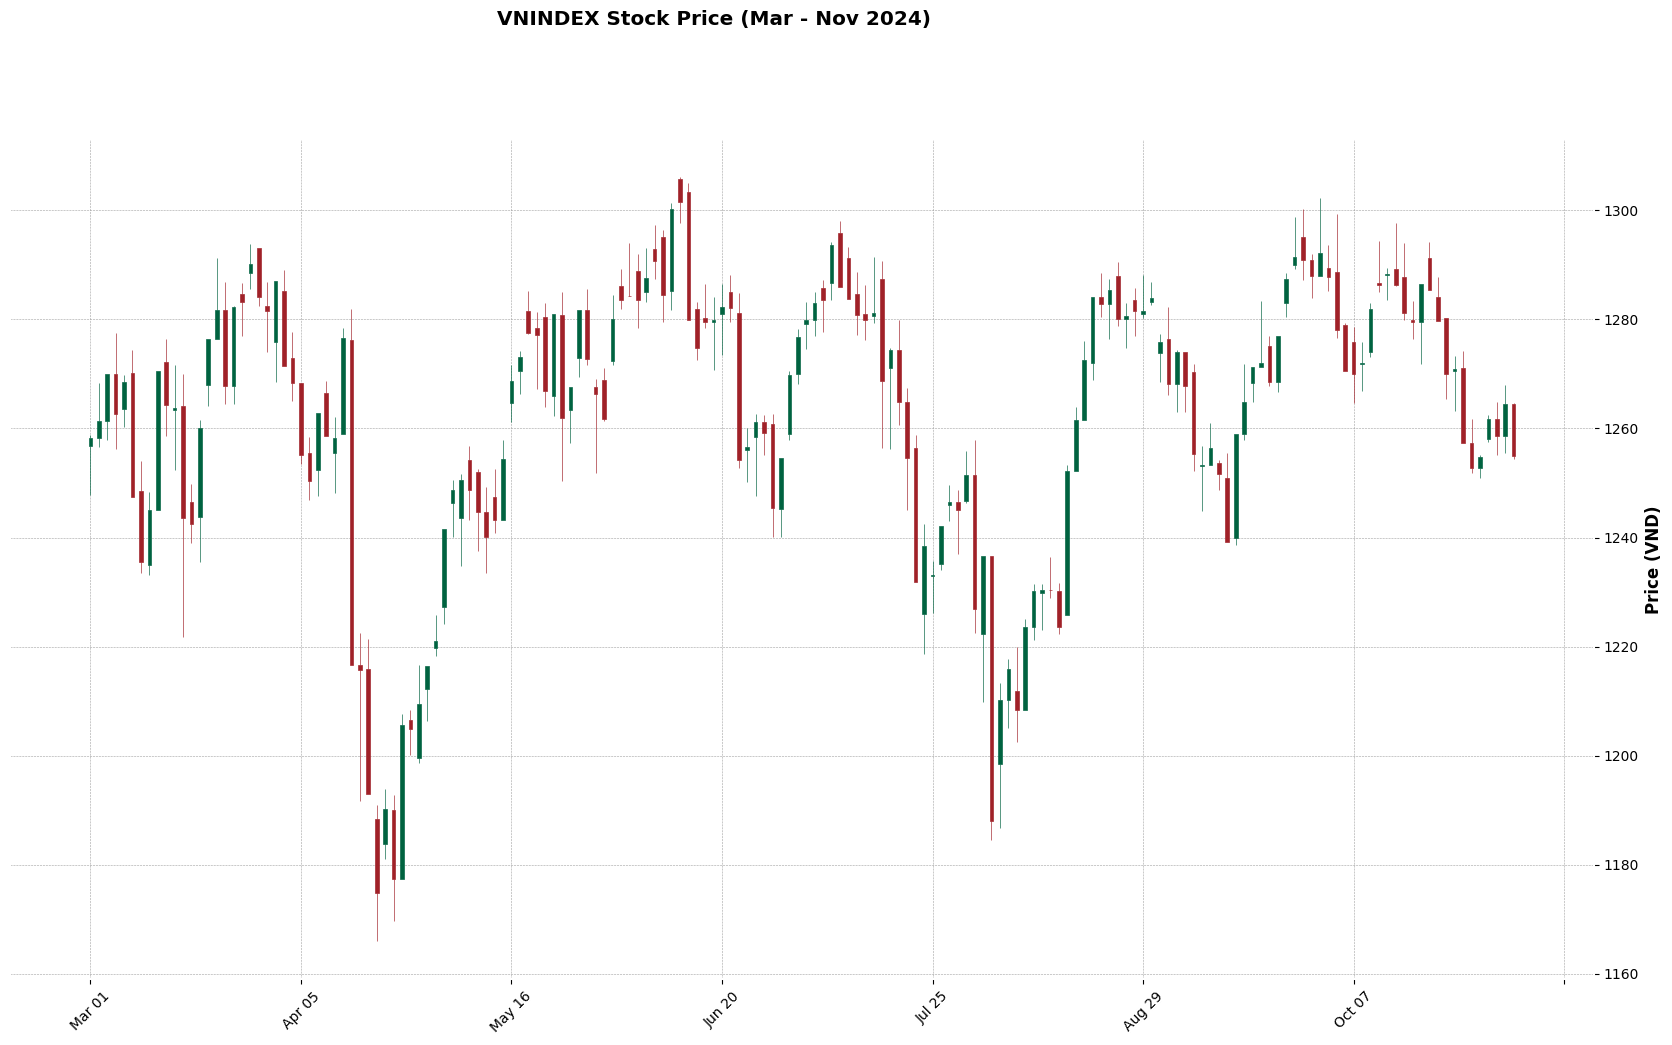

In [5]:
import mplfinance as mpf
import pandas as pd

# List all stock symbols by classification groups such as HOSE, VN30, VNMidCap, VNSmallCap, VNAllShare, VN100, ETF, HNX, HNX30, HNXCon, HNXFin, HNXLCap, HNXMSCap, HNXMan, UPCOM, FU_INDEX (futures index contracts), CW (covered warrants)

# Initialize the VNINDEX stock
stock = Vnstock().stock(symbol='VNINDEX')

# Retrieve historical stock data for VNINDEX
vnindex = stock.quote.history(symbol='VNINDEX', start='2017-09-01', end='2024-10-31', interval='1D')

# Convert the 'time' column to datetime format
vnindex['time'] = pd.to_datetime(vnindex['time'])  # Ensure the 'time' column is in datetime format
vnindex.set_index('time', inplace=True)

# Filter data for the period from March to November 2024
vnindex_mar_nov_2024 = vnindex['2024-03-01':'2024-11-01']

# Format the data for mplfinance (only using open, high, low, close columns)
vnindex_mar_nov_2024_mpf = vnindex_mar_nov_2024[['open', 'high', 'low', 'close']].copy()

# Plot a candlestick chart for the period from March to November 2024
mpf.plot(
    vnindex_mar_nov_2024_mpf,
    type='candle',
    style='charles',
    title='VNINDEX Stock Price (Mar - Nov 2024)',
    ylabel='Price (VND)',
    figsize=(22, 12)
)


##Data Cleaning

In [6]:
# Inspect the data
print("Data Head:\n", vnindex.head())
print("\nSummary Statistics:\n", vnindex.describe())
print("\nData Columns:\n", vnindex.columns)
print("\nMissing Values:\n", vnindex.isnull().sum())


Data Head:
               open    high     low   close     volume
time                                                 
2017-09-01  784.42  789.19  784.18  788.73  137914410
2017-09-05  790.26  794.46  787.80  792.31  153091050
2017-09-06  792.16  793.82  788.89  793.55  144147770
2017-09-07  793.61  798.58  792.77  796.72  143540810
2017-09-08  797.98  802.90  797.82  801.20  122071810

Summary Statistics:
               open         high          low        close        volume
count  1791.000000  1791.000000  1791.000000  1791.000000  1.791000e+03
mean   1098.400229  1105.265572  1090.219564  1098.203026  4.895624e+08
std     183.803269   184.624827   182.179314   183.204952  3.173217e+08
min     655.490000   665.560000   649.100000   659.210000  8.741713e+07
25%     961.180000   966.680000   955.600000   961.335000  1.755974e+08
50%    1062.030000  1070.150000  1054.080000  1063.660000  4.970562e+08
75%    1243.695000  1251.305000  1232.705000  1242.420000  7.123404e+08
max    1534.

In [7]:
# Check for duplicates
duplicates = vnindex.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if any
vnindex = vnindex.drop_duplicates()

# Convert time column to datetime if necessary (assuming index is 'time')
if not isinstance(vnindex.index, pd.DatetimeIndex):
    vnindex.index = pd.to_datetime(vnindex.index)

# Ensure proper sorting of dates
vnindex = vnindex.sort_index()

# Handle missing values if present
if vnindex.isnull().sum().sum() > 0:
    vnindex = vnindex.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill
    print("\nMissing values after handling:\n", vnindex.isnull().sum())



Number of duplicate rows: 0


## Feature Engineering

In [8]:
# Create additional features
vnindex['price_range'] = vnindex['high'] - vnindex['low']  # Price range (high - low)
vnindex['daily_return'] = vnindex['close'].pct_change()  # Daily percentage return
vnindex['log_return'] = np.log(vnindex['close'] / vnindex['close'].shift(1))  # Logarithmic return
vnindex['volume_million'] = vnindex['volume'] / 1e6  # Volume in millions

# Moving Averages
vnindex['SMA_20'] = vnindex['close'].rolling(window=20).mean()  # 20-day Simple Moving Average
vnindex['SMA_50'] = vnindex['close'].rolling(window=50).mean()  # 50-day Simple Moving Average
vnindex['EMA_20'] = vnindex['close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average
vnindex['EMA_50'] = vnindex['close'].ewm(span=50, adjust=False).mean()  # 50-day Exponential Moving Average

# Bollinger Bands
vnindex['BB_upper'] = vnindex['SMA_20'] + 2 * vnindex['close'].rolling(window=20).std()  # Upper Bollinger Band
vnindex['BB_lower'] = vnindex['SMA_20'] - 2 * vnindex['close'].rolling(window=20).std()  # Lower Bollinger Band

# RSI (Relative Strength Index)
delta = vnindex['close'].diff()  # Difference in closing prices
gain = delta.where(delta > 0, 0).rolling(window=14).mean()  # Average gain over 14 days
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()  # Average loss over 14 days
rs = gain / loss  # Relative strength
vnindex['RSI_14'] = 100 - (100 / (1 + rs))  # RSI calculation

# MACD (Moving Average Convergence Divergence)
vnindex['EMA_12'] = vnindex['close'].ewm(span=12, adjust=False).mean()  # 12-day EMA
vnindex['EMA_26'] = vnindex['close'].ewm(span=26, adjust=False).mean()  # 26-day EMA
vnindex['MACD'] = vnindex['EMA_12'] - vnindex['EMA_26']  # MACD line
vnindex['Signal_Line'] = vnindex['MACD'].ewm(span=9, adjust=False).mean()  # Signal line for MACD

# Volatility
vnindex['Volatility_10'] = vnindex['daily_return'].rolling(window=10).std()  # 10-day rolling standard deviation of returns

# True Range and ATR (Average True Range)
vnindex['TR1'] = vnindex['high'] - vnindex['low']  # High minus low
vnindex['TR2'] = abs(vnindex['high'] - vnindex['close'].shift(1))  # High minus previous close
vnindex['TR3'] = abs(vnindex['low'] - vnindex['close'].shift(1))  # Low minus previous close
vnindex['True_Range'] = vnindex[['TR1', 'TR2', 'TR3']].max(axis=1)  # Maximum of the three
vnindex['ATR'] = vnindex['True_Range'].rolling(window=14).mean()  # 14-day ATR
vnindex.drop(columns=['TR1', 'TR2', 'TR3', 'True_Range'], inplace=True)  # Drop intermediate columns

# OBV (On-Balance Volume)
vnindex['OBV'] = (np.sign(vnindex['close'].diff()) * vnindex['volume']).fillna(0).cumsum()  # OBV calculation

# Seasonal Features
vnindex['day_of_week'] = vnindex.index.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
vnindex['month'] = vnindex.index.month  # Month of the year

# Remove NaN values
vnindex.dropna(inplace=True)  # Drop rows with NaN values


In [9]:
# Save processed data for future analysis
vnindex.to_csv("vnindex_features.csv")
print("Processed data saved as 'vnindex_features.csv'")

Processed data saved as 'vnindex_features.csv'


In [10]:
# Read the 'hnxindex_features.csv' file to display its contents
import pandas as pd

# File path - Changed to current directory
file_path = 'vnindex_features.csv'

# Read the CSV file
vnindex_features = pd.read_csv(file_path)

# Display the first 5 rows of the data
vnindex_features.head()

,time,open,high,low,close,volume,price_range,daily_return,log_return,volume_million,...,RSI_14,EMA_12,EMA_26,MACD,Signal_Line,Volatility_10,ATR,OBV,day_of_week,month
0,2017-11-10,859.91,869.37,859.24,868.21,150413680,10.13,0.009077,0.009036,150.41368,...,78.533349,848.257222,835.701710,12.555512,10.222558,0.008129,9.543571,1.422908e+09,4,11
1,2017-11-13,871.70,879.34,871.70,879.34,189223330,7.64,0.012819,0.012738,189.22333,...,79.942440,853.039188,838.934176,14.105012,10.999048,0.008657,9.601429,1.612132e+09,0,11
2,2017-11-14,881.15,884.14,874.74,880.90,168957930,9.40,0.001774,0.001772,168.95793,...,79.039907,857.325467,842.042756,15.282711,11.855781,0.007365,9.711429,1.781090e+09,1,11
3,2017-11-15,877.65,884.83,876.60,882.59,162193450,8.23,0.001918,0.001917,162.19345,...,79.968022,861.212318,845.046255,16.166063,12.717837,0.007412,9.531429,1.943283e+09,2,11
4,2017-11-16,880.17,892.80,880.17,892.80,169624640,12.63,0.011568,0.011502,169.62464,...,79.956576,866.071961,848.583570,17.488392,13.671948,0.005066,9.582143,2.112908e+09,3,11


# 3. EXPLORATORY DATA ANALYSIS

## Descriptive Statistics

In [11]:
def descriptive_stats(df):
    return df.describe()

print(descriptive_stats(vnindex))


              open         high          low        close        volume  \
count  1742.000000  1742.000000  1742.000000  1742.000000  1.742000e+03   
mean   1106.351860  1113.298324  1098.009552  1106.115746  4.992770e+08   
std     180.035945   180.764708   178.592643   179.470133  3.163290e+08   
min     655.490000   665.560000   649.100000   659.210000  8.741713e+07   
25%     968.030000   972.652500   962.077500   966.872500  1.819472e+08   
50%    1071.605000  1079.615000  1063.730000  1071.565000  5.104794e+08   
75%    1246.362500  1254.472500  1235.287500  1245.485000  7.172992e+08   
max    1534.100000  1536.450000  1524.960000  1528.570000  1.708948e+09   

       price_range  daily_return   log_return  volume_million       SMA_20  \
count  1742.000000   1742.000000  1742.000000     1742.000000  1742.000000   
mean     15.288772      0.000294     0.000217      499.276957  1103.802667   
std      10.286685      0.012367     0.012438      316.329001   178.154477   
min       2.

## Visualization

The figure layout has changed to tight


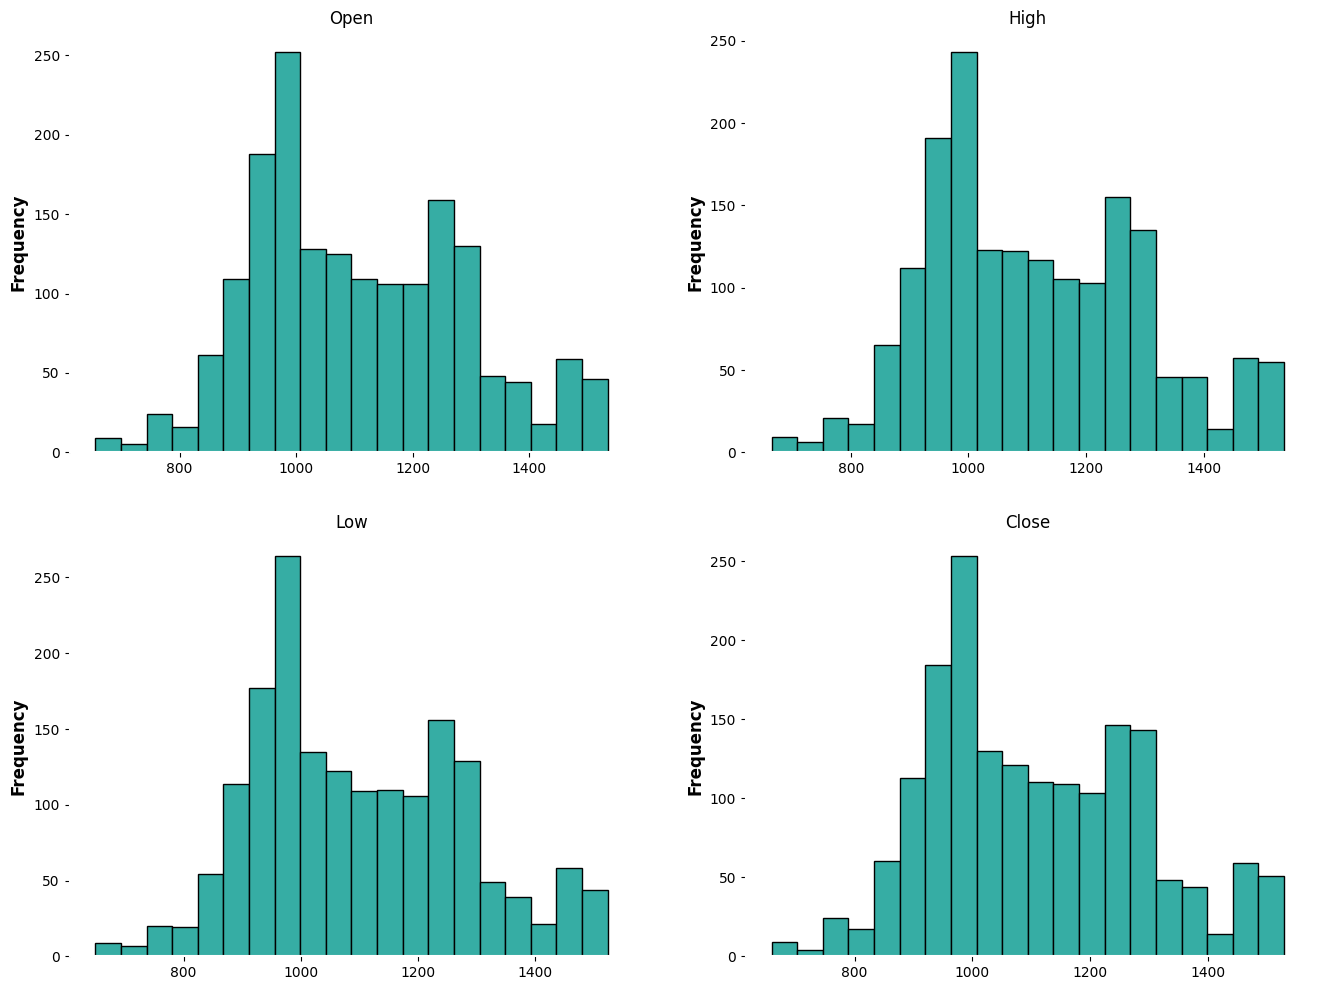

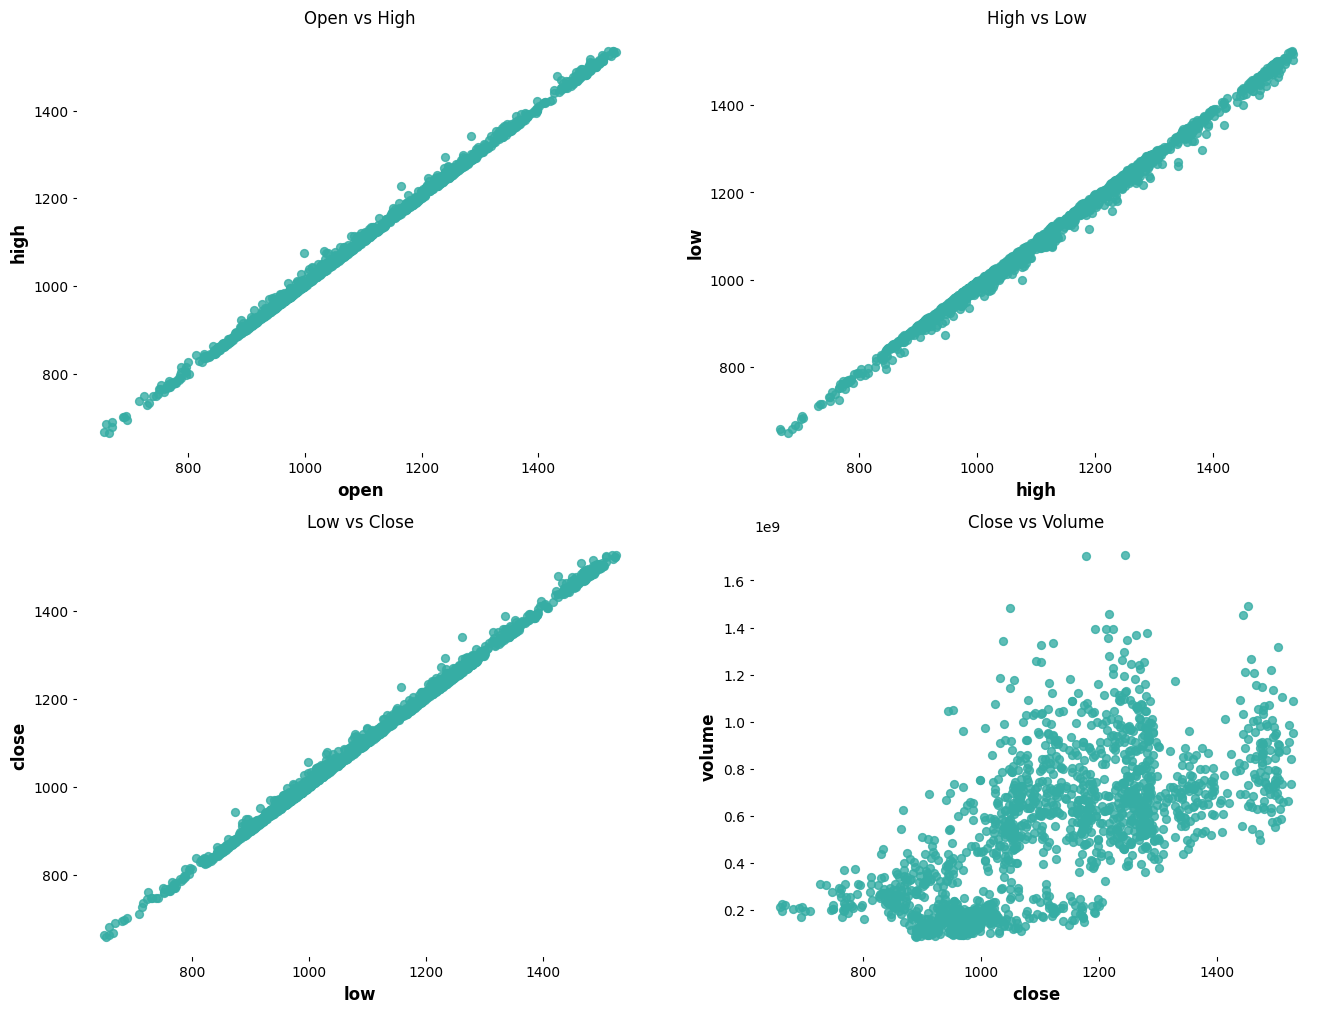

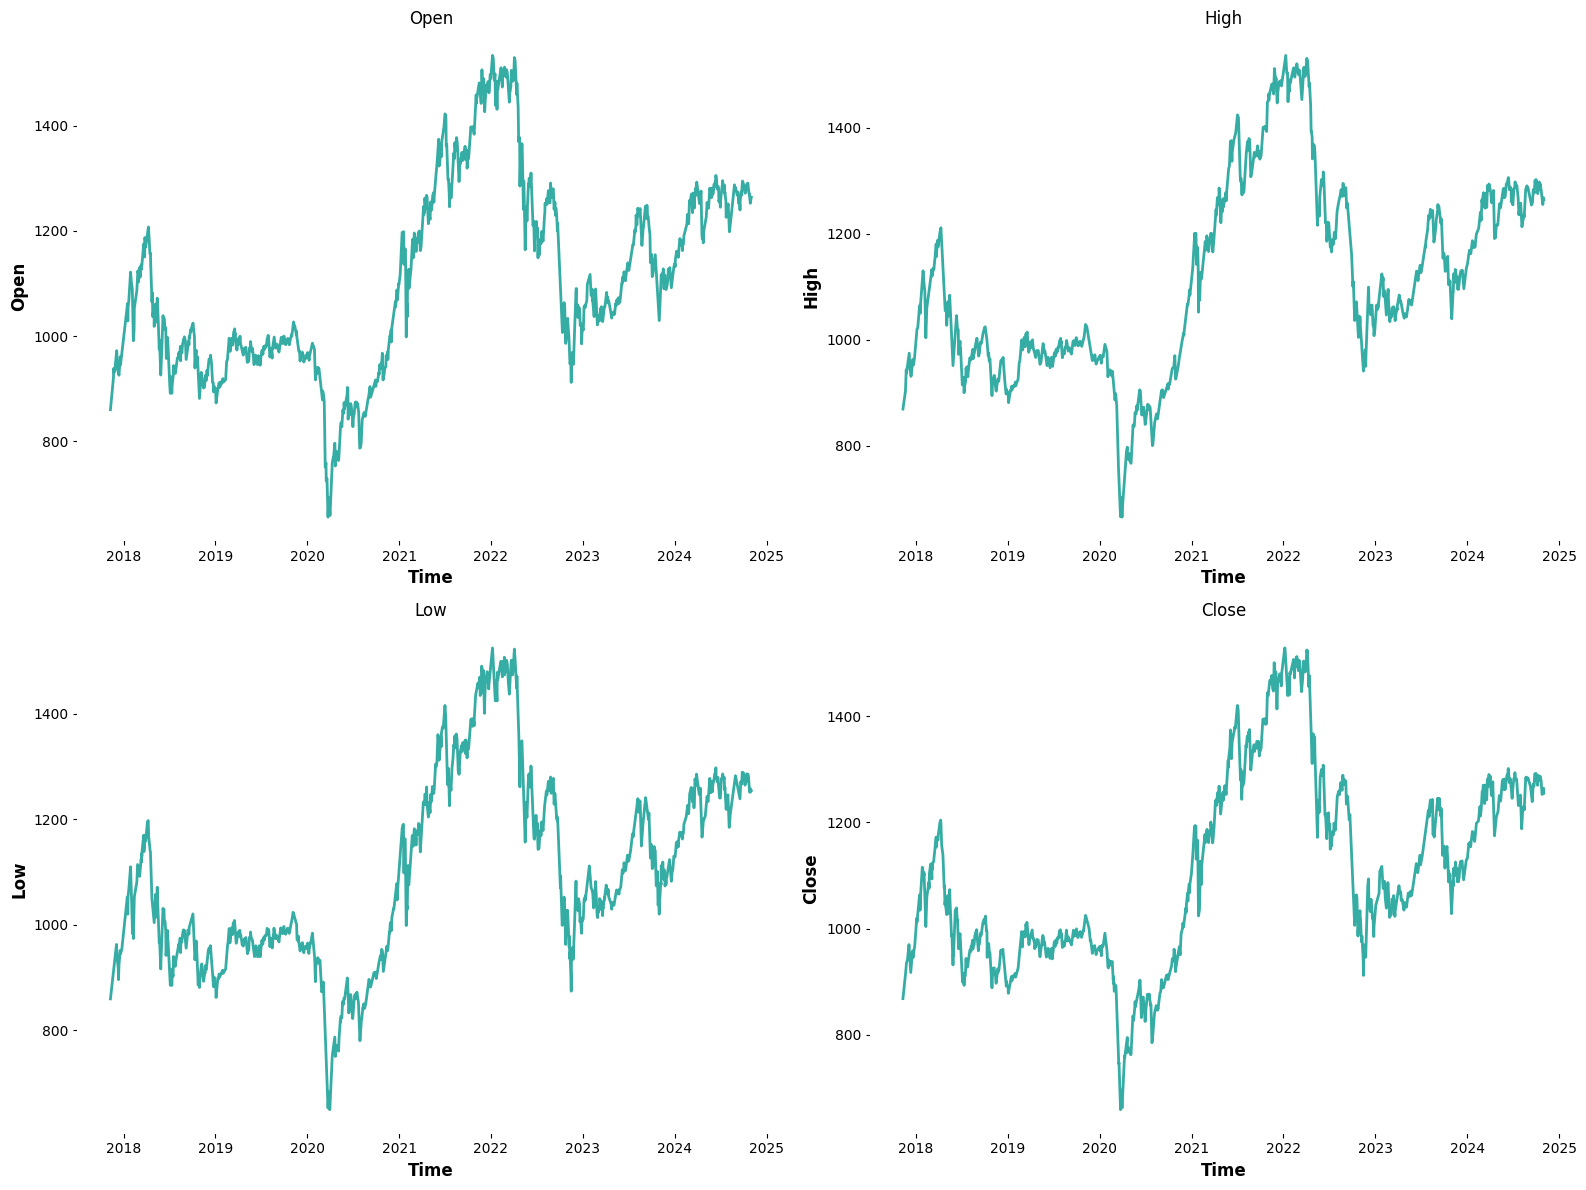

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Select the color palette and colors for the charts
palette = sns.color_palette("husl", 8)
selected_color = palette[4]

# Create a figure and a 2x2 grid for the histogram charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# List of histogram charts
price_columns = ['open', 'high', 'low', 'close']
for i, price_column in enumerate(price_columns):
    ax = axes[i // 2, i % 2]  # Select the subplot axis for the chart
    vnindex[price_column].plot(
        kind='hist', bins=20, ax=ax,
        title=price_column.capitalize(),
        color=selected_color, edgecolor='black'
    )
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(False)  # Hide the grid

# Create a figure and a 2x2 grid for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# List of value pairs for scatter plots
scatter_pairs = [('open', 'high'), ('high', 'low'), ('low', 'close'), ('close', 'volume')]
for i, (x_col, y_col) in enumerate(scatter_pairs):
    ax = axes[i // 2, i % 2]  # Select the subplot axis for the chart
    vnindex.plot(
        kind='scatter', x=x_col, y=y_col, s=32,
        alpha=0.8, ax=ax,
        title=f'{x_col.capitalize()} vs {y_col.capitalize()}',
        color=selected_color
    )
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(False)  # Hide the grid

# Define the list of value types for line plots
price_types = ['open', 'high', 'low', 'close']
dataframe = vnindex  # vnindex is the DataFrame containing the values to be plotted

def _plot_series(series, price_type, ax):
    # Select the color for the chart
    xs = series.index
    ys = series[price_type]

    # Plot the chart on the subplot (ax)
    ax.plot(xs, ys, label=price_type, color=selected_color)  # Apply the selected color
    ax.set_xlabel('Time')
    ax.set_ylabel(price_type.capitalize())
    ax.set_title(f'{price_type.capitalize()}')
    sns.despine(fig=fig, ax=ax)  # Remove unnecessary borders
    ax.grid(False)  # Hide the grid

# Create a 2x2 grid for the line charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12), layout='constrained')

# Iterate through value types and plot each on the corresponding grid cell
for price_type, ax in zip(price_types, axes.flatten()):
    _plot_series(dataframe, price_type, ax)

# Adjust the layout of the charts in the grid
plt.tight_layout()
plt.show()


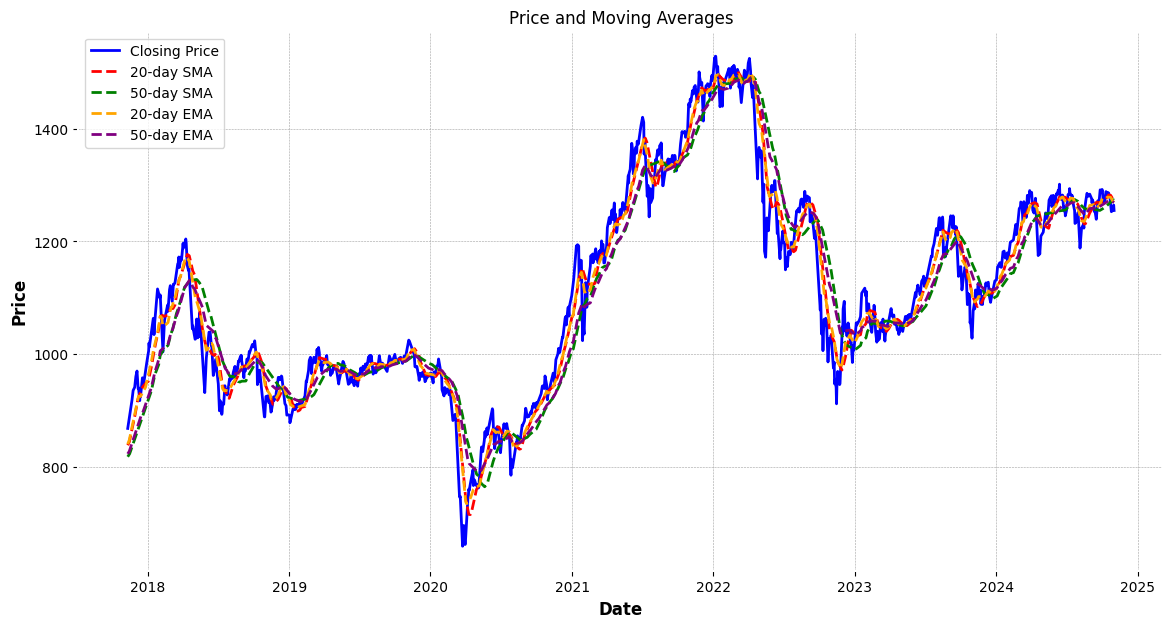

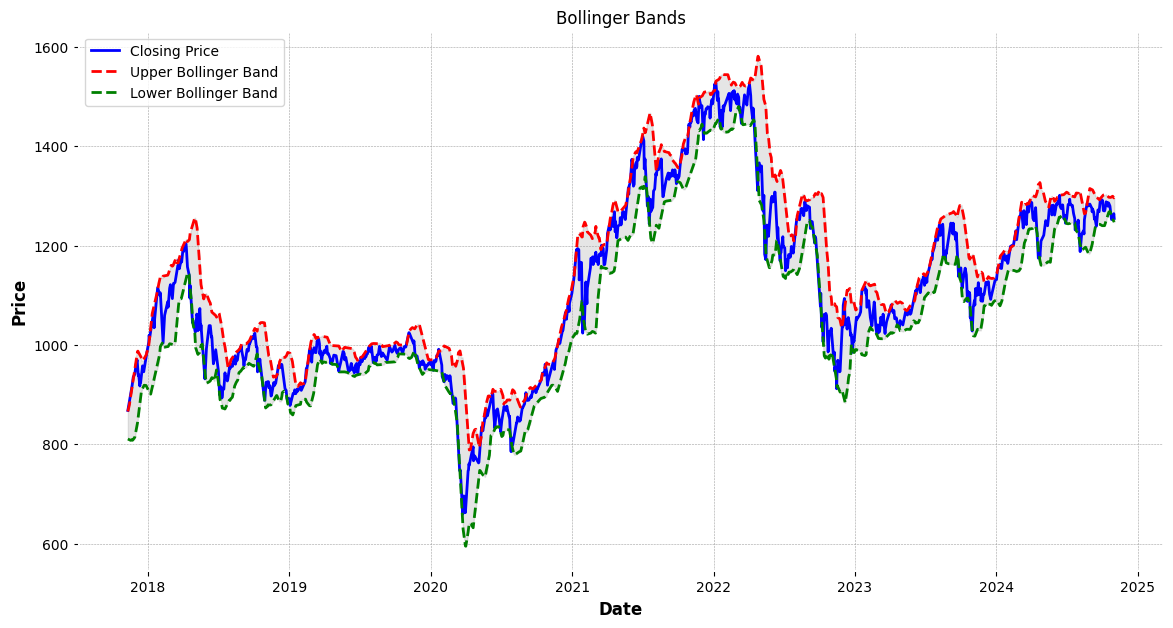

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Range, SMA, and EMA Plot
plt.figure(figsize=(14, 7))
plt.plot(vnindex['close'], label='Closing Price', color='blue')
plt.plot(vnindex['SMA_20'], label='20-day SMA', color='red', linestyle='--')
plt.plot(vnindex['SMA_50'], label='50-day SMA', color='green', linestyle='--')
plt.plot(vnindex['EMA_20'], label='20-day EMA', color='orange', linestyle='--')
plt.plot(vnindex['EMA_50'], label='50-day EMA', color='purple', linestyle='--')
plt.title('Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Bollinger Bands Plot
plt.figure(figsize=(14, 7))
plt.plot(vnindex['close'], label='Closing Price', color='blue')
plt.plot(vnindex['BB_upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(vnindex['BB_lower'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.fill_between(vnindex.index, vnindex['BB_upper'], vnindex['BB_lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


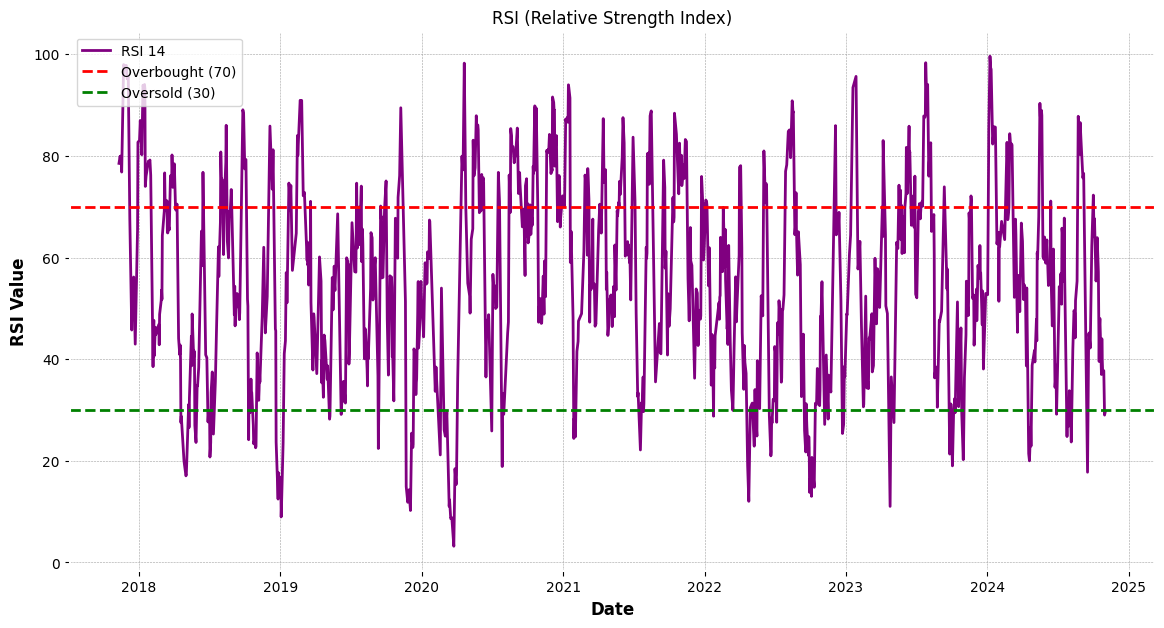

In [14]:
# RSI Plot
plt.figure(figsize=(14, 7))
plt.plot(vnindex['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


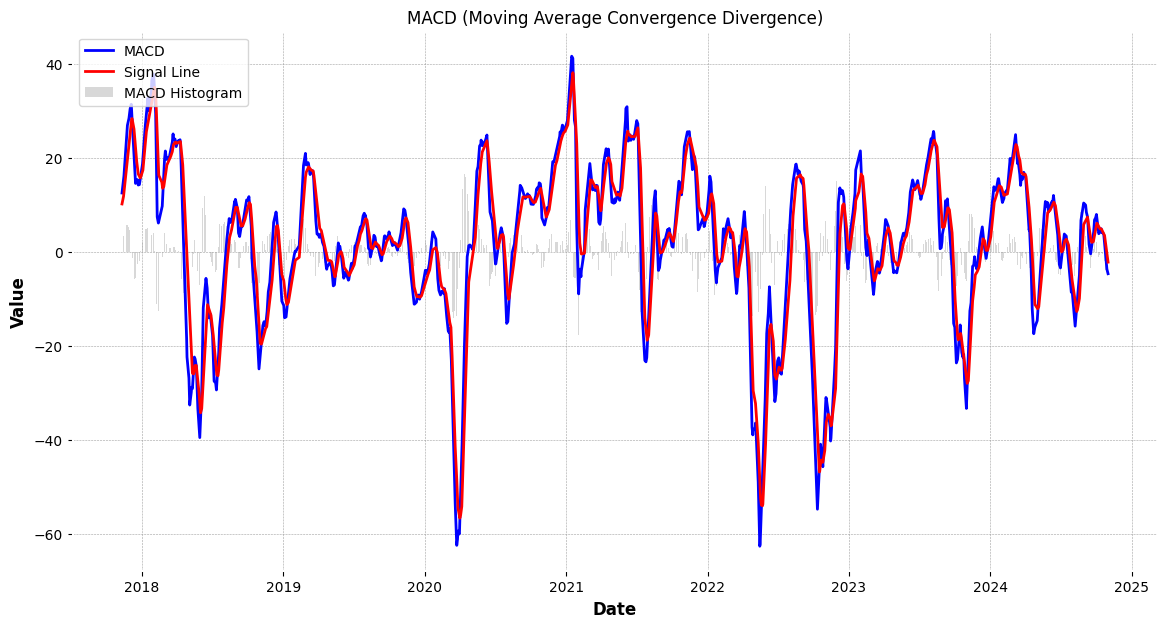

In [15]:
# MACD and Signal Line Plot
plt.figure(figsize=(14, 7))
plt.plot(vnindex['MACD'], label='MACD', color='blue')
plt.plot(vnindex['Signal_Line'], label='Signal Line', color='red')
plt.bar(vnindex.index, vnindex['MACD'] - vnindex['Signal_Line'], color='gray', alpha=0.3, label='MACD Histogram')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


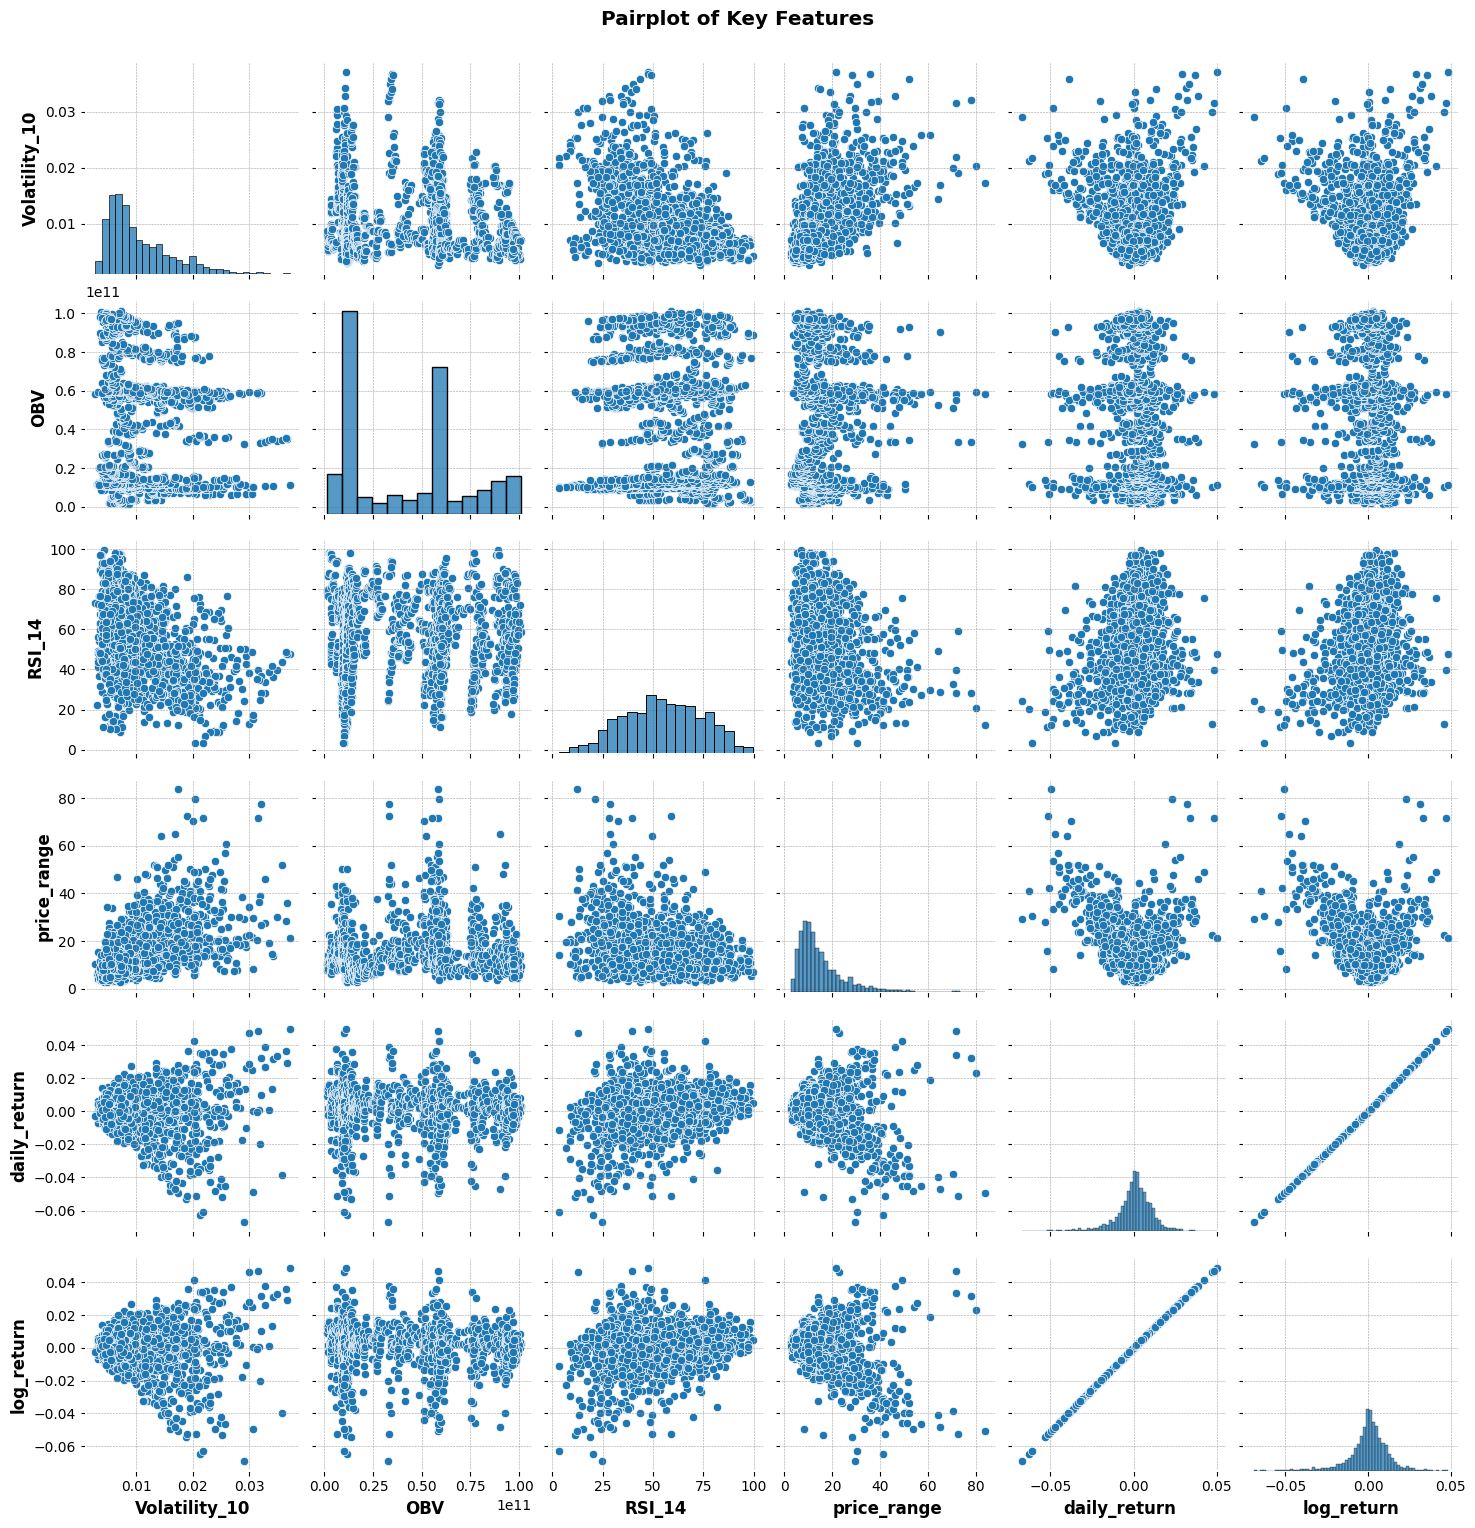

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to visualize relationships between features
sns.pairplot(vnindex[['Volatility_10', 'OBV', 'RSI_14', 'price_range', 'daily_return', 'log_return']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



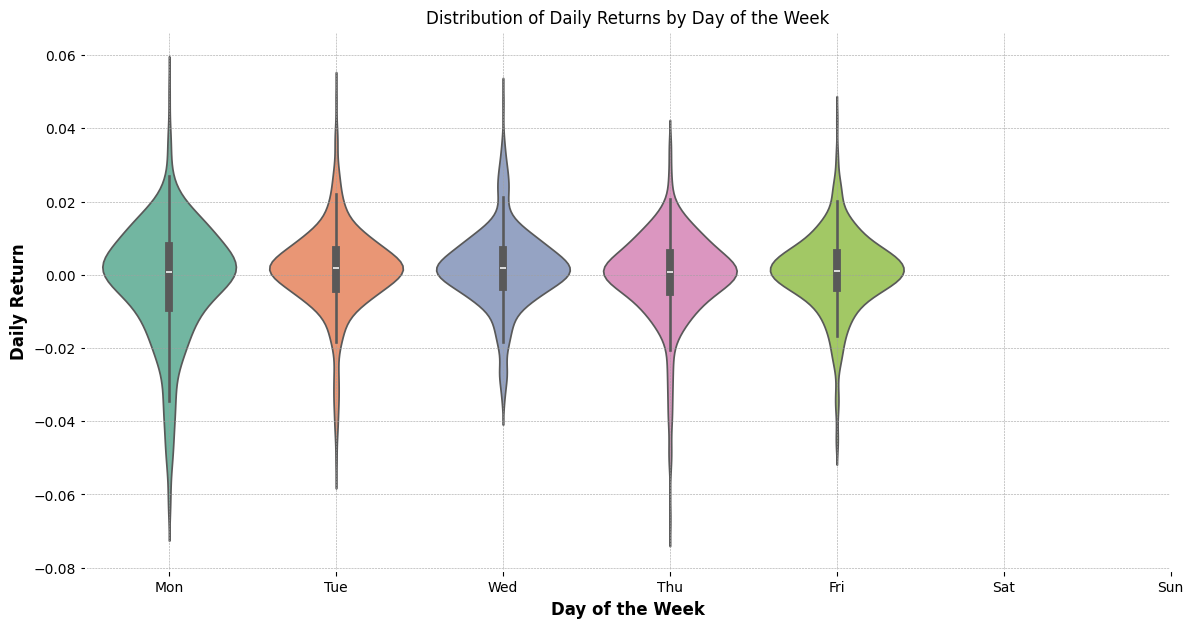



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



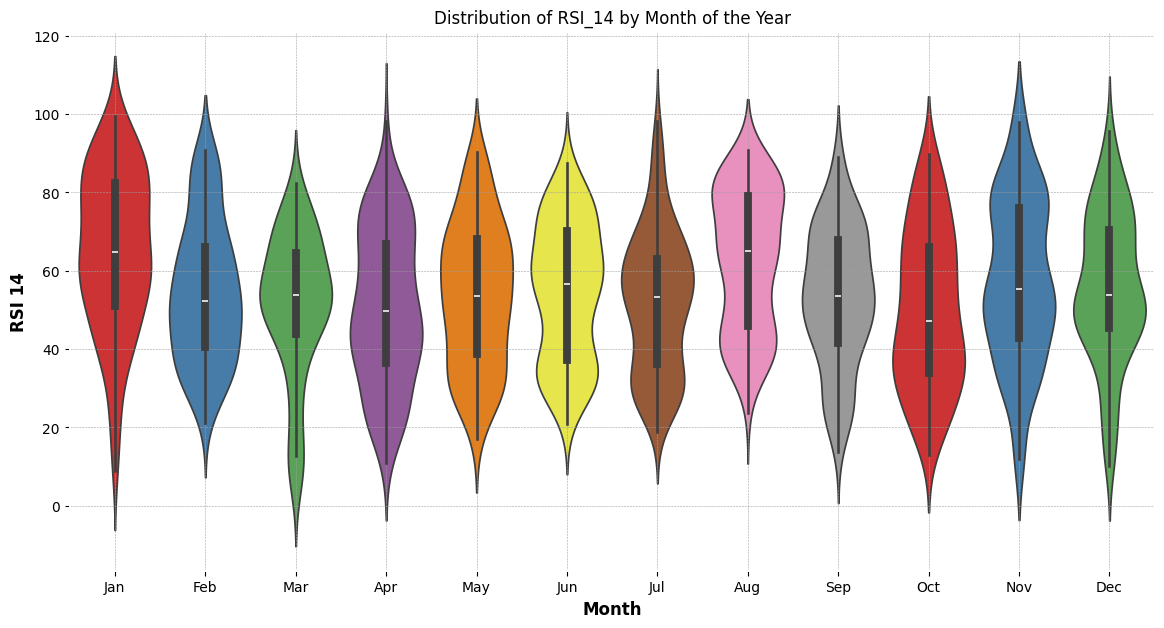

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for daily return by day of the week
plt.figure(figsize=(14, 7))
sns.violinplot(x='day_of_week', y='daily_return', data=vnindex, palette='Set2')

# Title and labels
plt.title('Distribution of Daily Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daily Return')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Violin plot for RSI_14 by month
plt.figure(figsize=(14, 7))
sns.violinplot(x='month', y='RSI_14', data=vnindex, palette='Set1')

# Title and labels
plt.title('Distribution of RSI_14 by Month of the Year')
plt.xlabel('Month')
plt.ylabel('RSI 14')

# Đảm bảo trục x có đủ 12 tháng và đúng thứ tự
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Thêm grid cho dễ nhìn
plt.grid(True)

# Hiển thị plot
plt.show()


## Heatmap (Correlation Matrix)

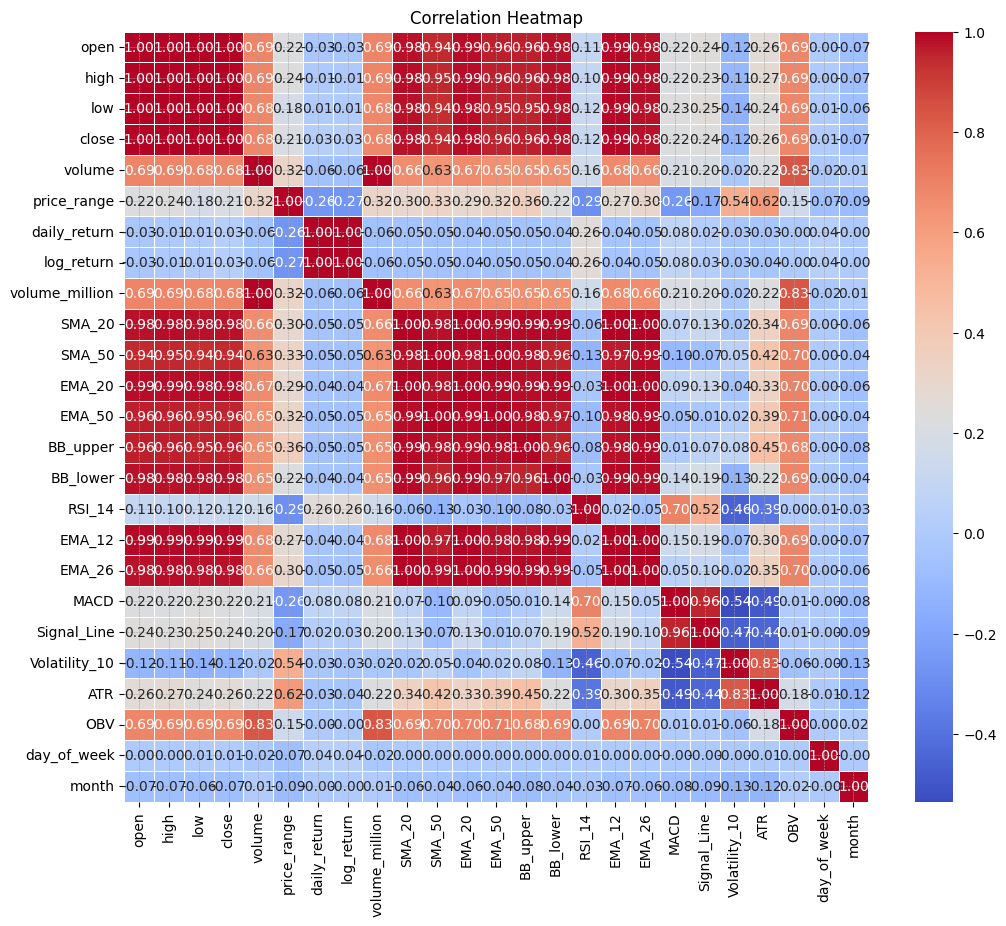

In [18]:
def plot_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap(vnindex)

## Correlation Analysis

In [19]:
def correlation_analysis(df):
    return df.corr()

print(correlation_analysis(vnindex))

                    open      high       low     close    volume  price_range  \
open            1.000000  0.999263  0.998615  0.997593  0.688889     0.222248   
high            0.999263  1.000000  0.998434  0.998780  0.690756     0.238338   
low             0.998615  0.998434  1.000000  0.998871  0.680735     0.183638   
close           0.997593  0.998780  0.998871  1.000000  0.683834     0.209319   
volume          0.688889  0.690756  0.680735  0.683834  1.000000     0.319844   
price_range     0.222248  0.238338  0.183638  0.209319  0.319844     1.000000   
daily_return   -0.030967 -0.008936  0.006094  0.029925 -0.057700    -0.262842   
log_return     -0.029671 -0.007881  0.007607  0.031157 -0.058339    -0.270554   
volume_million  0.688889  0.690756  0.680735  0.683834  1.000000     0.319844   
SMA_20          0.980766  0.982287  0.977069  0.979326  0.659299     0.298001   
SMA_50          0.944194  0.946748  0.939277  0.943010  0.632142     0.329622   
EMA_20          0.986232  0.

## Feature Importance (Random Forest)

In [20]:
from sklearn.ensemble import RandomForestRegressor

def feature_importance(df):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df.select_dtypes(include=[np.number]), df['close'])
    importance = rf.feature_importances_
    feature_importance = pd.DataFrame({'Feature': df.select_dtypes(include=[np.number]).columns, 'Importance': importance})
    return feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance(vnindex))

           Feature  Importance
3            close    0.989952
2              low    0.005640
1             high    0.003387
0             open    0.000664
18            MACD    0.000145
21             ATR    0.000085
22             OBV    0.000047
19     Signal_Line    0.000014
20   Volatility_10    0.000013
5      price_range    0.000007
15          RSI_14    0.000006
7       log_return    0.000005
23     day_of_week    0.000005
10          SMA_50    0.000003
6     daily_return    0.000003
14        BB_lower    0.000003
11          EMA_20    0.000003
12          EMA_50    0.000003
13        BB_upper    0.000003
4           volume    0.000002
17          EMA_26    0.000002
24           month    0.000002
9           SMA_20    0.000002
8   volume_million    0.000002
16          EMA_12    0.000001


# 4. SELECTION & VALIDATION MODEL

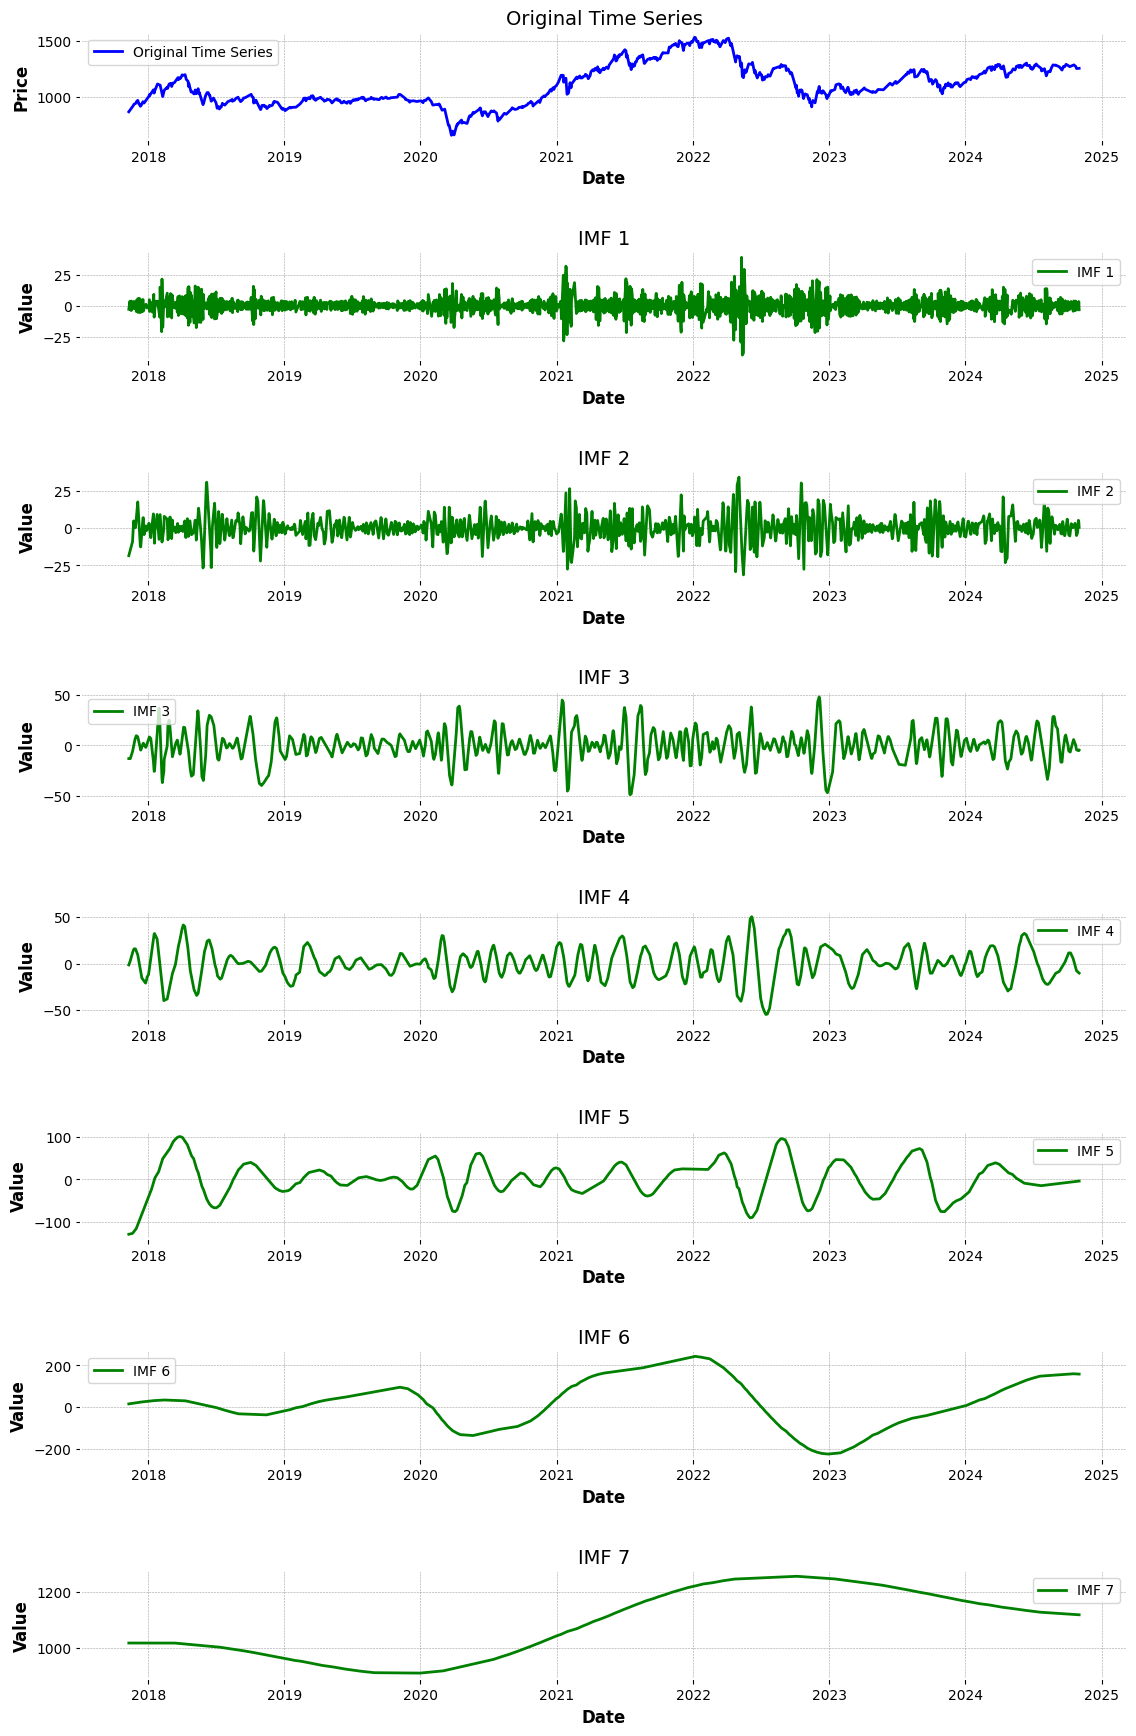

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import CEEMDAN

# Decompose the data ensure proper separation of residual
ceemdan = CEEMDAN()
close_prices = vnindex['close'].values  # Extract 'close' prices from vnindex DataFrame
imfs = ceemdan.ceemdan(close_prices)
residual = close_prices - np.sum(imfs, axis=0)

# Get number of IMFs
num_imfs = imfs.shape[0]

# Create a figure and subplots with a layout that leaves enough space
fig, axs = plt.subplots(num_imfs + 1, 1, figsize=(12, 18))  # Set the figure size (wider and taller)

# Plot original time series
axs[0].plot(vnindex.index, close_prices, 'b', label="Original Time Series")
axs[0].set_title("Original Time Series", fontsize=14)
axs[0].set_xlabel("Date", fontsize=12)
axs[0].set_ylabel("Price", fontsize=12)
axs[0].legend(loc="best")
axs[0].grid(True)

# Plot IMFs
for i in range(num_imfs):
    axs[i + 1].plot(vnindex.index, imfs[i], 'g', label=f"IMF {i + 1}")
    axs[i + 1].set_title(f"IMF {i + 1}", fontsize=14)
    axs[i + 1].set_xlabel("Date", fontsize=12)
    axs[i + 1].set_ylabel("Value", fontsize=12)
    axs[i + 1].legend(loc="best")
    axs[i + 1].grid(True)

# Adjust layout to avoid overlap and make everything fit well
plt.tight_layout(pad=3.0)  # Add padding between subplots for clarity

# Show the plot
plt.show()

# Lưu biểu đồ dưới dạng file PNG
fig.savefig('vn-index.png', format='png', dpi=300)
from google.colab import files
files.download('vn-index.png')


In [22]:
import pandas as pd

# Create a DataFrame from the IMF components and residual
imf_columns = {f'IMF_{i+1}': imf for i, imf in enumerate(imfs)}
imf_columns['Residual'] = residual
decomposed_data = pd.DataFrame(imf_columns)

# Set the index from the original data to the new DataFrame
decomposed_data.index = vnindex.index

# Save the data to a CSV file
decomposed_data.to_csv('vnindex_decomposed.csv', encoding='utf-8', index=True)

print("The decomposed data has been successfully saved to 'vnindex_decomposed.csv'.")


The decomposed data has been successfully saved to 'vnindex_decomposed.csv'.


In [23]:
# Read two CSV files
decomposed_data = pd.read_csv('vnindex_decomposed.csv', index_col=0, encoding='utf-8')
features_data = pd.read_csv('vnindex_features.csv', index_col=0, encoding='utf-8')

# Merge the two DataFrames based on the index
merged_data = pd.merge(features_data, decomposed_data, left_index=True, right_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('vnindex_merged.csv', encoding='utf-8', index=True)

print("The data has been merged and saved to 'vnindex_merged.csv'.")


The data has been merged and saved to 'vnindex_merged.csv'.


In [24]:
# File path - Changed to current directory
file_path = 'vnindex_merged.csv'

# Read the CSV file
vnindex_features = pd.read_csv(file_path)

# Display the first 5 rows of the data
vnindex_features.head()


,time,open,high,low,close,volume,price_range,daily_return,log_return,volume_million,...,day_of_week,month,IMF_1,IMF_2,IMF_3,IMF_4,IMF_5,IMF_6,IMF_7,Residual
0,2017-11-10,859.91,869.37,859.24,868.21,150413680,10.13,0.009077,0.009036,150.41368,...,4,11,-2.829389,-18.423381,-13.064497,-1.510063,-128.185293,15.459798,1016.762826,0.000000e+00
1,2017-11-13,871.70,879.34,871.70,879.34,189223330,7.64,0.012819,0.012738,189.22333,...,0,11,3.564048,-16.042350,-13.391970,0.729525,-128.213880,15.851550,1016.843077,0.000000e+00
2,2017-11-14,881.15,884.14,874.74,880.90,168957930,9.40,0.001774,0.001772,168.95793,...,1,11,-0.690628,-13.353218,-13.116686,2.999350,-128.103434,16.243206,1016.921410,1.136868e-13
3,2017-11-15,877.65,884.83,876.60,882.59,162193450,8.23,0.001918,0.001917,162.19345,...,2,11,-3.507686,-12.753616,-12.176704,5.246743,-127.851178,16.634623,1016.997819,0.000000e+00
4,2017-11-16,880.17,892.80,880.17,892.80,169624640,12.63,0.011568,0.011502,169.62464,...,3,11,3.761432,-14.406630,-10.617326,7.418910,-127.454331,17.025650,1017.072295,1.136868e-13


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Read the dataset
vnindex = pd.read_csv('vnindex_merged.csv', index_col=0, parse_dates=True)

# Prepare the data
# Select the feature columns and the target column
features = vnindex.drop(columns=['close'])  # Remove the closing price column ('close')
target = vnindex['close']  # The target column is 'close'

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Create time series data sequences
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

# Set the window size for the sliding window
window_size = 30
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 28, 64)              │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 28, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,651 (193.95 KB)

 Trainable params: 49,651 (193.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - loss: 0.0329 - mae: 0.1341 - val_loss: 0.0032 - val_mae: 0.0477
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0051 - mae: 0.0551 - val_loss: 0.0013 - val_mae: 0.0267
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0034 - mae: 0.0448 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0030 - mae: 0.0418 - val_loss: 0.0033 - val_mae: 0.0513
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0043 - mae: 0.0519 - val_loss: 8.1391e-04 - val_mae: 0.0209
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0026 - mae: 0.0383 - val_loss: 9.6181e-04 - val_mae: 0.0231
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0028 - mae: 0.0399 - val_loss: 6.8091e-04 - val_mae: 0.0196
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0026 - mae: 0.0385 - val_loss: 0.0010 - val_mae: 0.0258
Epoch 9/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5402e-04 - mae: 0.0091
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
RMSE: 0.01
MAE: 0.01
MAPE: 2.15%


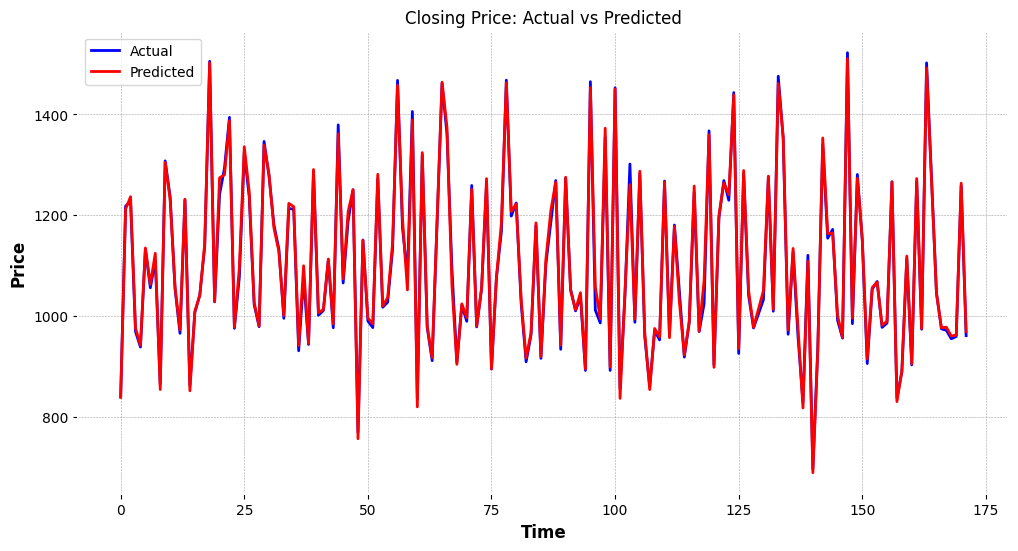

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Convert predicted and actual values back to the original scale
target_scaler = MinMaxScaler()
target_scaler.fit(vnindex['close'].values.reshape(-1, 1))

y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

# Display the actual vs predicted results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(y_pred_actual, label='Predicted', color='red')
plt.legend()
plt.title('Closing Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
